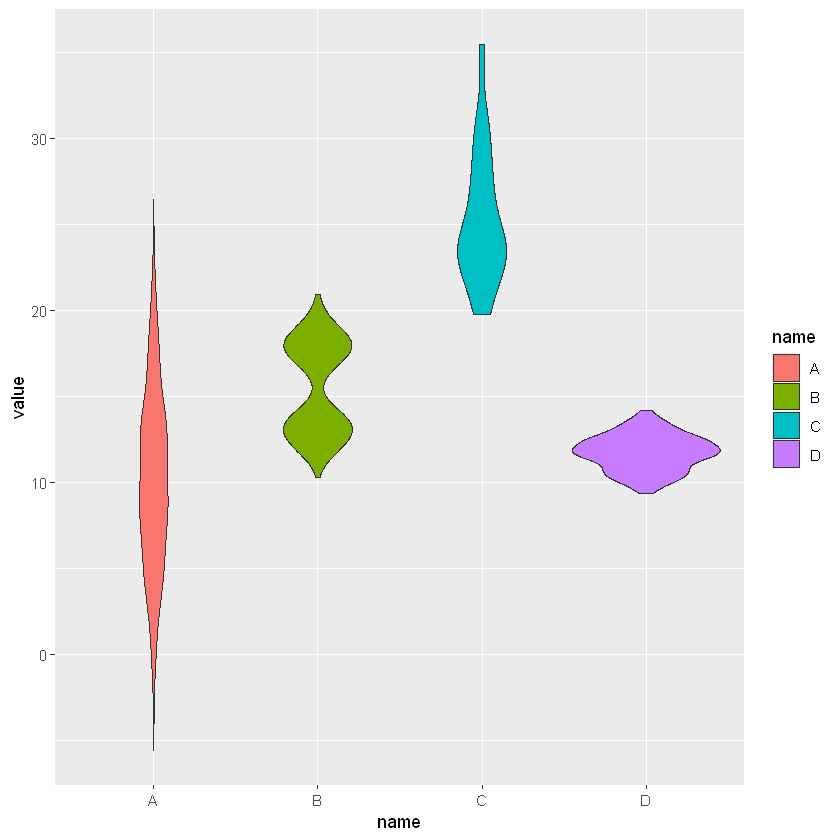

In [7]:
# Library
library(ggplot2)

# create a dataset
data <- data.frame(
  name=c( rep("A",500), rep("B",500), rep("B",500), rep("C",20), rep('D', 100)  ),
  value=c( rnorm(500, 10, 5), rnorm(500, 13, 1), rnorm(500, 18, 1), rnorm(20, 25, 4), rnorm(100, 12, 1) )
)

# Most basic violin chart
p <- ggplot(data, aes(x=name, y=value, fill=name)) + # fill=name allow to automatically dedicate a color for each group
  geom_violin()
p
#p

In [15]:
# Libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(forcats)
library(hrbrthemes)
library(viridis)

# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv", header=TRUE, sep=",")

# Data is at wide format, we need to make it 'tidy' or 'long'
data <- data %>% 
  gather(key="text", value="value") %>%
  mutate(text = gsub("\\.", " ",text)) %>%
  mutate(value = round(as.numeric(value),0)) %>%
  filter(text %in% c("Almost Certainly","Very Good Chance","We Believe","Likely","About Even", "Little Chance", "Chances Are Slight", "Almost No Chance"))

# Plot
p <- data %>%
  mutate(text = fct_reorder(text, value)) %>% # Reorder data
  ggplot( aes(x=text, y=value, fill=text, color=text)) +
    geom_violin(width=2.1, size=0.2) +
    scale_fill_viridis(discrete=TRUE) +
    scale_color_viridis(discrete=TRUE) +
    theme_ipsum() +
    theme(
      legend.position="none"
    ) +
    coord_flip() + # This switch X and Y axis and allows to get the horizontal version
    xlab("") +
    ylab("Assigned Probability (%)")

p

Warning message in file(file, "rt"):
"URL 'https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv': status was 'Couldn't resolve host name'"


ERROR: Error in file(file, "rt"): cannot open the connection to 'https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv'


Joining, by = "name"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font d

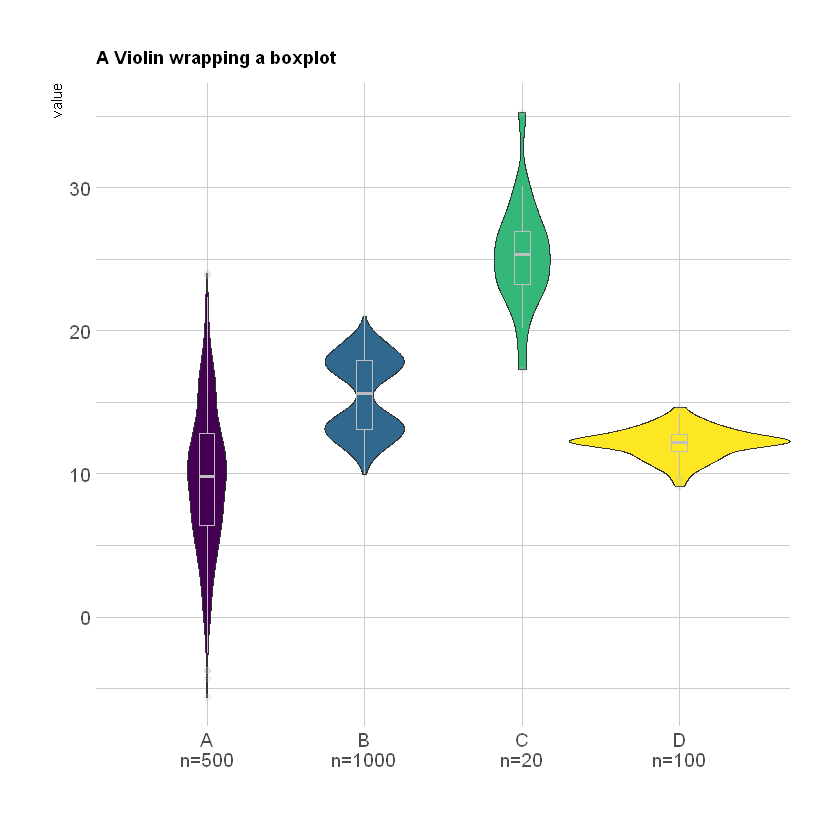

In [18]:
library(ggplot2)
library(dplyr)
library(hrbrthemes)
library(viridis)

# create a dataset
data <- data.frame(
  name=c( rep("A",500), rep("B",500), rep("B",500), rep("C",20), rep('D', 100)  ),
  value=c( rnorm(500, 10, 5), rnorm(500, 13, 1), rnorm(500, 18, 1), rnorm(20, 25, 4), rnorm(100, 12, 1) )
)

# sample size
sample_size = data %>% group_by(name) %>% summarize(num=n())

# Plot
data %>%
  left_join(sample_size) %>%
  mutate(myaxis = paste0(name, "\n", "n=", num)) %>%
  ggplot( aes(x=myaxis, y=value, fill=name)) +
    geom_violin(width=1.4) +
    geom_boxplot(width=0.1, color="grey", alpha=0.2) +
    scale_fill_viridis(discrete = TRUE) +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("A Violin wrapping a boxplot") +
    xlab("")